In [1]:
from ctrl import *

In [2]:
# To get the high accuracy required in the paper you must do the following
## set: n_observations = 40,000
## run the whole file from begging to end
n_observations = 10
n_steps = 1000
data_prepared = create_observations(n_observations)
data_prepared.shape

100%|██████████| 10/10 [00:00<00:00, 77.09it/s]


(10, 1000, 12)

In [3]:
# save dataset in 3D format
np.save('data/data_prepared_3D.npy', data_prepared)

In [4]:
data_prepared = np.load('data/data_prepared_3D.npy')

# Modelling

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Bidirectional, GRU, LSTM, Dense
from tensorflow.keras.models import Sequential

In [6]:
X_data = data_prepared[:, :,0:-3]
y_data = data_prepared[:, :,-3:]

In [7]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, 9)))
model.add(Dense(units=3, activation='selu'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [8]:
history = model.fit(X_data, y_data, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 56s 33ms/step - loss: 0.0100 - accuracy: 0.9836
Epoch 2/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.4633e-04 - accuracy: 0.9961
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0173e-04 - accuracy: 0.9966
Epoch 4/5
1563/1563 [==============================] - 52s 33ms/step - loss: 6.0237e-05 - accuracy: 0.9975
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 5.2149e-05 - accuracy: 0.9977


In [9]:
sample = data_prepared[1500]
x_sample = sample[:,0:-3].reshape(1, sample.shape[0], 9)
y_sample = sample[:,-3:].reshape(1, sample.shape[0], 3)

predictions = model.predict(x_sample).reshape(1, sample.shape[0], 3)

In [10]:
s_true = y_sample[:,:,0].flatten()
v_true = y_sample[:,:,1].flatten()
i_true = y_sample[:,:,2].flatten()

s_pred = predictions[:,:,0].flatten()
v_pred = predictions[:,:,1].flatten()
i_pred = predictions[:,:,2].flatten()

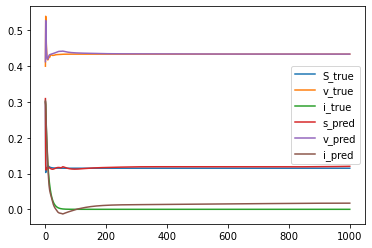

In [13]:
import matplotlib.pyplot as plt
t = np.arange(1, s_true.shape[0]+1)
# plot lines
plt.plot(t, s_true, label = "S_true")
plt.plot(t, v_true, label = "v_true")
plt.plot(t, i_true, label = "i_true")
plt.plot(t, s_pred, label = "s_pred")
plt.plot(t, v_pred, label = "v_pred")
plt.plot(t, i_pred, label = "i_pred")
plt.legend()
plt.show()

In [14]:
model.save('lstm_model')

INFO:tensorflow:Assets written to: lstm_model\assets


INFO:tensorflow:Assets written to: lstm_model\assets
